In [77]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [78]:
with open("../Data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 100]
# df_test = df_test.loc[df_test.session < 100]

In [79]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
95995,1507,755,TRIGGER,JELLY,7,15,499
95996,1635,616,ZEBRA,FURNITURE,8,15,499
95997,1313,175,SKATE,BRIEFCASE,9,15,499
95998,981,1438,ORCHESTRA,TAXI,10,15,499


In [80]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
63995,1297,SHRIMP,1053,3,0,15,499
63996,1205,ROOF,1156,1,0,15,499
63997,1436,TART,488,11,0,15,499
63998,755,JELLY,1507,7,1,15,499


### Run CMR-IA

In [81]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [82]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.5,
    beta_cue = 0.5,
    beta_distract = 0,
    beta_rec_new = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  # cf - fc Higher, -1 Higher
    gamma_cf = 0.6,
    s_fc = 0.2,
    s_cf = 0.15,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 8,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 20,
    d_ass = 0.7
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_cue': 0.5,
 'beta_rec_new': 0.1,
 'beta_rec_post': 0.1,
 'beta_distract': 0,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.15,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 8,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.7,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 20,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [83]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 226.01177382469177


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,841.0,1380.0,0.782411
1,0,0,1347,823.0,1320.0,0.798581
2,0,0,413,879.0,1820.0,0.667627
3,0,0,812,679.0,1530.0,0.733474
4,0,0,110,524.0,1720.0,0.716754
...,...,...,...,...,...,...
63995,15,499,1297,1097.0,1630.0,0.681533
63996,15,499,1205,1156.0,1420.0,0.864836
63997,15,499,1436,1635.0,2100.0,0.649006
63998,15,499,755,1507.0,3330.0,0.748426


In [84]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,841.0,1380.0,0.782411,CLIPPERS,823,9,1,False
1,0,0,1347,823.0,1320.0,0.798581,SPARROW,1051,8,1,False
2,0,0,413,879.0,1820.0,0.667627,CROSS,524,7,0,False
3,0,0,812,679.0,1530.0,0.733474,LEOPARD,1323,5,0,False
4,0,0,110,524.0,1720.0,0.716754,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1097.0,1630.0,0.681533,SHRIMP,1053,3,0,False
63996,15,499,1205,1156.0,1420.0,0.864836,ROOF,1156,1,0,True
63997,15,499,1436,1635.0,2100.0,0.649006,TART,488,11,0,False
63998,15,499,755,1507.0,3330.0,0.748426,JELLY,1507,7,1,True


In [85]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,841.0,1380.0,0.782411,CLIPPERS,823,9,1,False,0.0,11.0
1,0,0,1347,823.0,1320.0,0.798581,SPARROW,1051,8,1,False,0.0,9.0
2,0,0,413,879.0,1820.0,0.667627,CROSS,524,7,0,False,0.0,6.0
3,0,0,812,679.0,1530.0,0.733474,LEOPARD,1323,5,0,False,0.0,6.0
4,0,0,110,524.0,1720.0,0.716754,BED,1083,0,0,False,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1097.0,1630.0,0.681533,SHRIMP,1053,3,0,False,15.0,6.0
63996,15,499,1205,1156.0,1420.0,0.864836,ROOF,1156,1,0,True,15.0,1.0
63997,15,499,1436,1635.0,2100.0,0.649006,TART,488,11,0,False,15.0,8.0
63998,15,499,755,1507.0,3330.0,0.748426,JELLY,1507,7,1,True,15.0,7.0


In [86]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,841.0,1380.0,0.782411,CLIPPERS,823,9,1,False,0.0,11.0,0.0,2.0,ILI
1,0,0,1347,823.0,1320.0,0.798581,SPARROW,1051,8,1,False,0.0,9.0,0.0,1.0,ILI
2,0,0,413,879.0,1820.0,0.667627,CROSS,524,7,0,False,0.0,6.0,0.0,-1.0,ILI
3,0,0,812,679.0,1530.0,0.733474,LEOPARD,1323,5,0,False,0.0,6.0,0.0,1.0,ILI
4,0,0,110,524.0,1720.0,0.716754,BED,1083,0,0,False,0.0,7.0,0.0,7.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1097.0,1630.0,0.681533,SHRIMP,1053,3,0,False,15.0,6.0,0.0,3.0,ILI
63996,15,499,1205,1156.0,1420.0,0.864836,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1635.0,2100.0,0.649006,TART,488,11,0,False,15.0,8.0,0.0,-3.0,ILI
63998,15,499,755,1507.0,3330.0,0.748426,JELLY,1507,7,1,True,15.0,7.0,0.0,0.0,Correct


In [87]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1560.0,0.774807,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1950.0,0.758278,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1430.0,0.834777,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1292.0,1860.0,0.644903,DUNE,1534,11,0,False,1.0,6.0,0.0,-5.0,ILI
12,1,0,844,396.0,1070.0,0.811972,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1097.0,1630.0,0.681533,SHRIMP,1053,3,0,False,15.0,6.0,0.0,3.0,ILI
63996,15,499,1205,1156.0,1420.0,0.864836,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1635.0,2100.0,0.649006,TART,488,11,0,False,15.0,8.0,0.0,-3.0,ILI
63998,15,499,755,1507.0,3330.0,0.748426,JELLY,1507,7,1,True,15.0,7.0,0.0,0.0,Correct


In [88]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1560.0,0.774807,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1950.0,0.758278,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1430.0,0.834777,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1292.0,1860.0,0.644903,DUNE,1534,11,0,False,1.0,6.0,0.0,-5.0,ILI
12,1,0,844,396.0,1070.0,0.811972,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
13,1,0,586,1446.0,1800.0,0.847141,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,2520.0,0.840118,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1850.0,0.833828,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,1002.0,1470.0,0.746532,BRIDE,414,10,0,False,2.0,9.0,0.0,-1.0,ILI
17,2,0,492,845.0,2370.0,0.840707,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [89]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    28747
ILI        30530
NoResp       313
PLI          410
Name: list, dtype: int64

In [90]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.4791166666666667

In [91]:
np.array(f_in).shape

(500, 128, 384)

In [92]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [93]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [94]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [95]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [96]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,1,14.0,0.003165
1,-13.0,1,13.0,0.003165
2,-12.0,4,12.0,0.012658
3,-11.0,6,11.0,0.018987
4,-10.0,5,10.0,0.015823
5,-9.0,12,9.0,0.037975
6,-8.0,12,8.0,0.037975
7,-7.0,17,7.0,0.053797
8,-6.0,23,6.0,0.072785
9,-5.0,20,5.0,0.063291


In [97]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
508,15,3,1487,835.0,1920.0,0.612756,TOTE,1454,11,0,False,13.0,0.0,-2.0,-11.0,PLI
833,8,6,1387,1152.0,1110.0,0.639442,STORE,757,11,1,False,5.0,9.0,-3.0,-2.0,PLI
842,9,6,1575,304.0,1680.0,0.630745,VOLCANO,713,10,0,False,6.0,7.0,-3.0,-3.0,PLI
1091,8,8,849,585.0,1460.0,0.595960,LUNCH,164,4,1,False,7.0,0.0,-1.0,-4.0,PLI
1343,7,10,791,992.0,3900.0,0.647460,LABYRINTH,1150,11,0,False,5.0,0.0,-2.0,-11.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63446,10,495,262,116.0,2180.0,0.611096,CAULIFLOWER,1172,10,0,False,5.0,2.0,-5.0,-8.0,PLI
63553,8,496,705,1109.0,2000.0,0.581181,HERD,330,11,0,False,6.0,4.0,-2.0,-7.0,PLI
63559,8,496,772,490.0,2690.0,0.635218,KETTLE,46,5,0,False,7.0,1.0,-1.0,-4.0,PLI
63827,10,498,1578,834.0,1620.0,0.606220,WAGON,1033,11,0,False,8.0,0.0,-2.0,-11.0,PLI


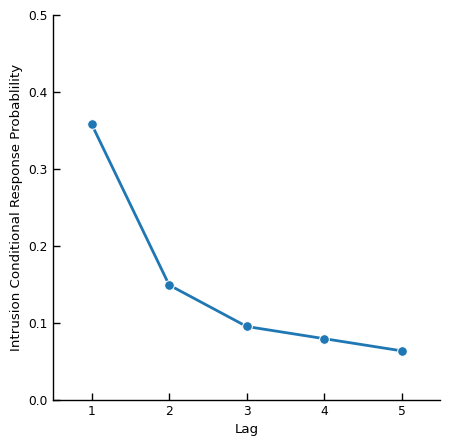

In [98]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_PLI.pdf')
plt.show()

In [99]:
df_ILI = df_simu.loc[df_simu.intrusion_type == 'ILI']
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1560.0,0.774807,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1950.0,0.758278,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
11,1,0,506,1292.0,1860.0,0.644903,DUNE,1534,11,0,False,1.0,6.0,0.0,-5.0,ILI
16,2,0,173,1002.0,1470.0,0.746532,BRIDE,414,10,0,False,2.0,9.0,0.0,-1.0,ILI
18,2,0,1465,1209.0,1770.0,0.725594,TIDE,1002,9,1,False,2.0,8.0,0.0,-1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63992,15,499,1313,488.0,1560.0,0.785226,SKATE,175,9,0,False,15.0,11.0,0.0,2.0,ILI
63993,15,499,993,175.0,1580.0,0.778414,OWNER,1097,6,1,False,15.0,9.0,0.0,3.0,ILI
63995,15,499,1297,1097.0,1630.0,0.681533,SHRIMP,1053,3,0,False,15.0,6.0,0.0,3.0,ILI
63997,15,499,1436,1635.0,2100.0,0.649006,TART,488,11,0,False,15.0,8.0,0.0,-3.0,ILI


In [100]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1     0.779153
2     0.760436
3     0.764706
4     0.629773
5     0.580168
6     0.704331
7     0.776186
8     0.678571
9     0.753350
10    0.687347
11    0.680685
12    0.773481
13    0.807960
14    0.838906
15    0.737237
Name: pos_lag, dtype: float64

In [101]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt').reset_index()
# df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
ILI_num = df_ILI.shape[0]
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / ILI_num
df_ILIgp

,pos_lag,ILI_cnt,ILI_prob
0,-11.0,88,0.002882
1,-10.0,215,0.007042
2,-9.0,296,0.009695
3,-8.0,394,0.012905
4,-7.0,514,0.016836
5,-6.0,584,0.019129
6,-5.0,801,0.026236
7,-4.0,1110,0.036358
8,-3.0,1534,0.050246
9,-2.0,2333,0.076417


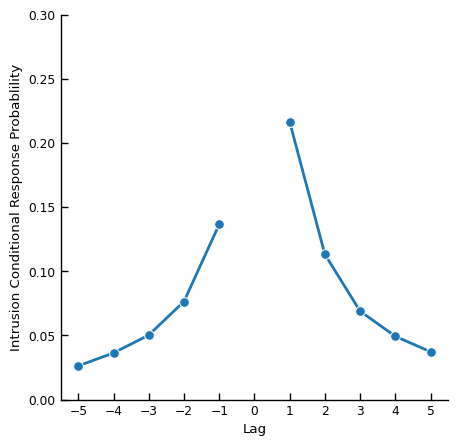

In [102]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_ILI.pdf')
plt.show()